In [1]:
import pandas as pd

In [30]:
df = pd.read_csv("/kaggle/input/all-the-news/articles1.csv")

In [31]:
df = df.drop('url', axis=1)

In [32]:
df = df.dropna()
len(df)

43694

In [54]:
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.head()

,id,title,publication,author,date,year,month,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,"SEOUL, South Korea — North Korea’s leader, ..."


In [55]:
df.head(2)

,id,title,publication,author,date,year,month,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,"After the bullet shells get counted, the blood..."


In [57]:
#1. определите количество различных издательств в таблице;
df['publication'].nunique()

5

In [124]:
#1 check
df_shares = df['publication'].value_counts()
df_shares

Breitbart           23781
New York Times       7767
CNN                  7025
Business Insider     4950
Atlantic              171
Name: publication, dtype: int64

In [59]:
#2. найдите количество опубликованных статей в отрезке [2016-06-01, 2016-12-31];
df2 = df[(df['date'] >= "2016-06-01") & (df['date']<= "2016-12-31")]
len(df2)

17159

In [66]:
#3. посчитайте распределение статей автора Tom Ciccotta по годам
df2 = df [(df['author'] =='Tom Ciccotta')]

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='year', ylabel='count'>

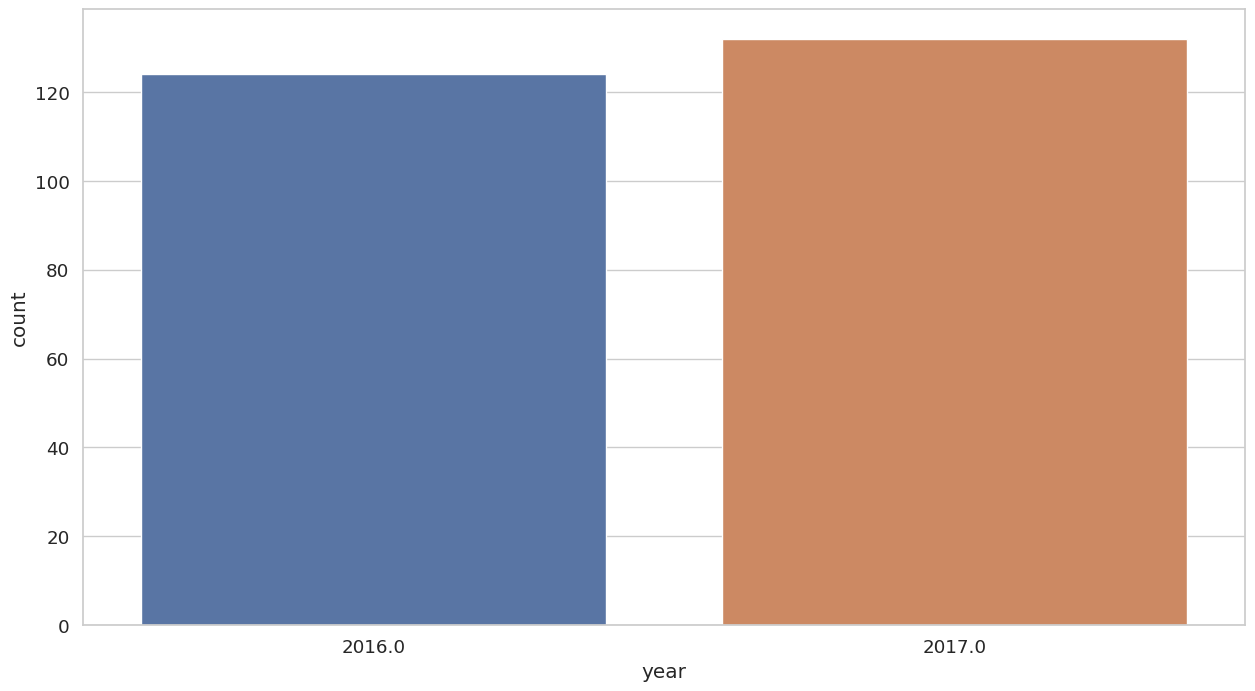

In [77]:
sns.countplot(x=df2['year'])

In [103]:
df_Tom = df [(df['author'] =='Tom Ciccotta')&(df2['year'] ==2016 )]
len(df_Tom)

124

In [104]:
df_Tom2 = df [(df['author'] =='Tom Ciccotta')&(df2['year'] == 2017 )]
len(df_Tom2)

132

In [111]:
#4. найдите месяц, в котором было наибольшее число статей;
df_4 = df.groupby(['month'])['publication'].count()
print(df_4)

month
1.0     5235
2.0     4678
3.0     5138
4.0     5170
5.0     4140
6.0     4165
7.0     2677
8.0     2678
9.0     2592
10.0    2260
11.0    2341
12.0    2620
Name: publication, dtype: int64


In [120]:
#5. выпишите 3 первые статьи автора John Hayward в 2016 году.
df_5 = df[(df['author'] == "John Hayward") & (df['year'] == 2016)]
df_5 = df_5.sort_values(['date'], ascending=[True])
df_5

,id,title,publication,author,date,year,month,content
16861,35600,Indonesian Couple Beaten with Canes for Violat...,Breitbart,John Hayward,2016-01-01,2016.0,1.0,Islamic sharia law was enforced with canes onc...
22041,40791,Islamic State Claims Credit For Gun Attack On ...,Breitbart,John Hayward,2016-01-01,2016.0,1.0,The Islamic State has claimed responsibility f...
27561,46325,Protests Across India Against Saudi Execution ...,Breitbart,John Hayward,2016-01-04,2016.0,1.0,Protests over Saudi Arabia’s execution of Shii...
27618,46382,Chinese Scientist Plans to Clone a Million Cow...,Breitbart,John Hayward,2016-01-04,2016.0,1.0,A Chinese company called Boyalife Genomics is ...
27922,46688,Mark Zuckerberg Wants a Robot Butler Like Tony...,Breitbart,John Hayward,2016-01-04,2016.0,1.0,Facebook founder and CEO Mark Zuckerberg’s New...
...,...,...,...,...,...,...,...,...
29496,48268,Peter Schweizer: Trump Dissolves Foundation an...,Breitbart,John Hayward,2016-12-27,2016.0,12.0,"Breitbart News Senior Peter Schweizer, pres..."
21399,40149,Report: Islamic State General Flees to Europe ...,Breitbart,John Hayward,2016-12-29,2016.0,12.0,According to an Italian intelligence report qu...
21734,40484,Putin Announces Ceasefire in Syria U.S. and UN...,Breitbart,John Hayward,2016-12-29,2016.0,12.0,Russian President Vladimir Putin announced on ...
13467,32204,Seven Ways Obama Is Trying to Sabotage the Tru...,Breitbart,John Hayward,2016-12-30,2016.0,12.0,President Barack Obama’s final weeks in office...


Text(0.5, 1.0, 'Cоотношение различных издательств')

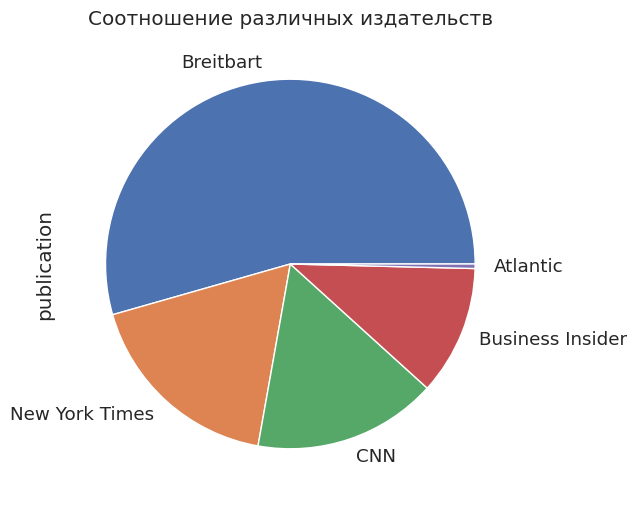

In [132]:
#Задача 2. Bизуализируйте соотношение различных издательств, используя pie plot.
plot = df_shares.plot.pie(subplots=True, figsize=(11, 6))
plt.title("Cоотношение различных издательств")

In [1]:
def task_1(n):
    a = 0
    b = 1
    for __ in range(n):
        a, b = b, a + b
    return a
print(task_1(5))

5
